# PROJECT 1A: K-Nearest Neighbours

tpham328



IMPORT DATA


In [89]:
#import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from warnings import filterwarnings
filterwarnings(action='ignore')

LOADING DATASET

In [90]:
data = pd.read_csv("winequality-white.csv")
print("Successfully Imported Data!")

data.head()
# print(data.shape)

Successfully Imported Data!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [91]:
data.describe(include='all')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [92]:
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


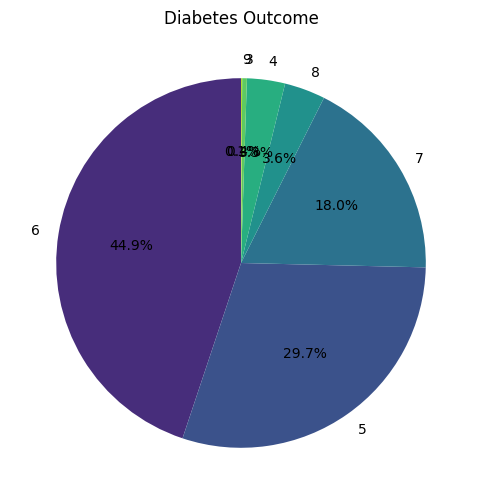

In [93]:
counts = data['quality'].value_counts()
print(counts)

plt.figure(figsize=(8, 6))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(counts)))
plt.title('Diabetes Outcome')
plt.ylabel('')  # Hide the y-label
plt.show()

In [94]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Does not have multicollinearity

<Axes: >

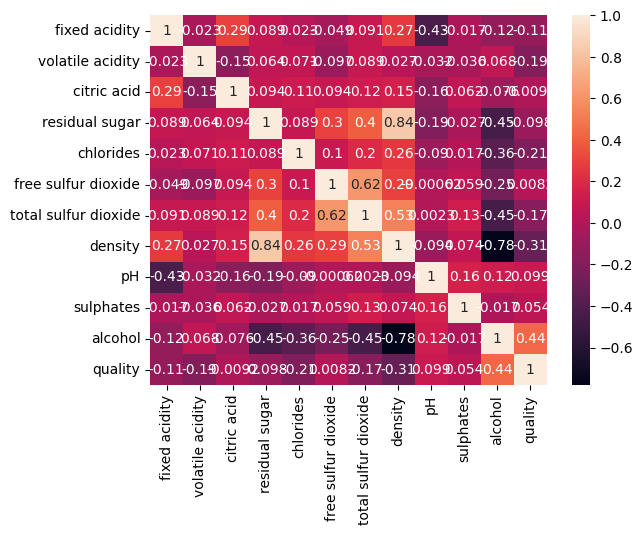

In [95]:
corr = data.corr()
sns.heatmap(corr,annot=True)

In [96]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = 'quality')

# Y = data['quality']
# Y = [1 if x >= 7 else 0 for x in data['quality']]

# Y = data['quality'].apply(lambda x: 'low' if x <= 5 else 1 if x == 6 else 2)

original_Y = data['quality']
def class_quality(value):
    if value <= 5:
        return 'low'
    elif value == 6:
        return 'medium'
    elif value >= 7:
        return 'high'
Y = original_Y.apply(class_quality)


# filtered_data = data[data['quality'].isin([4, 5, 6, 7, 8])]
# X = filtered_data.drop(columns='quality')
# Y = filtered_data['quality']

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)


Y.value_counts(1)




quality
medium    0.448755
low       0.334831
high      0.216415
Name: proportion, dtype: float64

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=328)



In [98]:
# from imblearn.over_sampling import SMOTE
# # strategy={4:1500,7:1500,8:1500}
# strategy={1:3000}
# print(Y_train.count(0))
# print(Y_train.count(1))
# smote = SMOTE(sampling_strategy=strategy,random_state=328)
# X_train, Y_train = smote.fit_resample(X_train,Y_train)

# # print(Y_train.count(0))
# # print(Y_train.count(1))

# # Y_train.value_counts(0)
# print(Y_train.count(0))
# print(Y_train.count(1))

# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=328)
# X_train, Y_train = smote.fit_resample(X_train,Y_train)
# Y_train.value_counts(0)

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import validation_curve, learning_curve, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [100]:
# GRID SEARCH FOR OPTIMAL HYPERPARAMETERS

knn_param_grid = {
    'n_neighbors': np.arange(5,101,5),
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
knn_gridSearch = GridSearchCV(knn, knn_param_grid, cv = 5, scoring = 'accuracy')
knn_gridSearch.fit(X_train,Y_train)

# result
print("Best Score: " + str(knn_gridSearch.best_score_))
print("Best Parameters: " + str(knn_gridSearch.best_params_))


Best Score: 0.59367001589908
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 30}


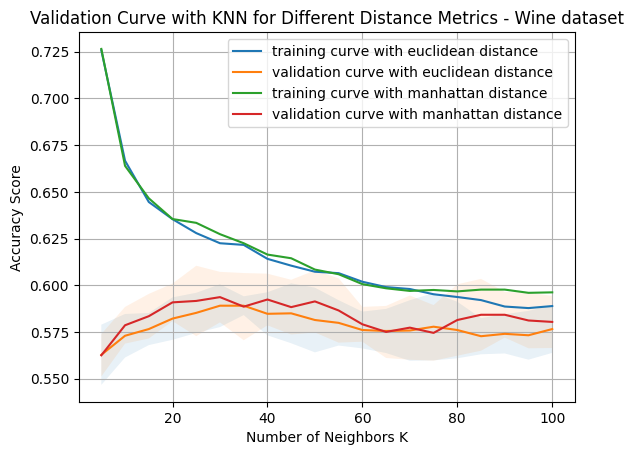

In [101]:
# VALIDATION CURVE
# plt.figure(figsize=(12, 6))
for metric in knn_param_grid['metric']:
    train_scores, test_scores = validation_curve(
        KNeighborsClassifier(metric = metric),
        X_train, Y_train,
        param_name="n_neighbors",
        param_range=knn_param_grid['n_neighbors'],
        cv =5,
        scoring = 'accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(knn_param_grid['n_neighbors'], test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1)
    plt.plot(knn_param_grid['n_neighbors'], train_scores_mean, label = f'training curve with {metric} distance')
    plt.plot(knn_param_grid['n_neighbors'], test_scores_mean, label = f'validation curve with {metric} distance')


plt.title("Validation Curve with KNN for Different Distance Metrics - Wine dataset")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy Score")
# plt.ylim(0.5, 0.7)
plt.grid()
plt.legend(loc="best")
plt.show()

In [102]:
X_train.shape

(3918, 11)

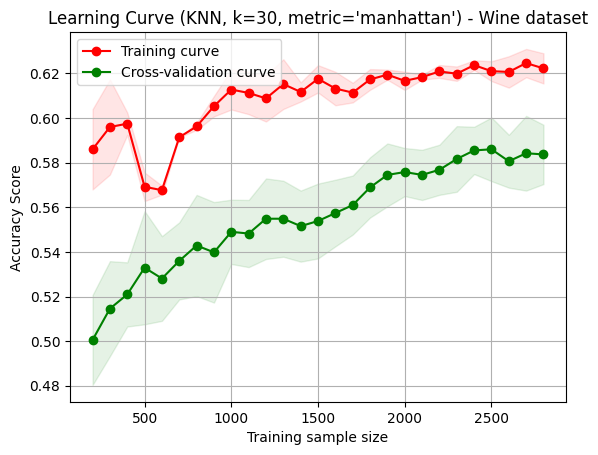

In [103]:
knn = KNeighborsClassifier(n_neighbors = 30, metric = 'manhattan')

train_sizes = np.arange(200, 2900, 100)

train_sizes, train_scores, test_scores = learning_curve(
    knn,
    X_train, Y_train,
    cv = 5,
    train_sizes=train_sizes,
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#plot learning curve
# plt.figure(figsize=(12, 6))
plt.title("Learning Curve (KNN, k=30, metric='manhattan') - Wine dataset")
plt.xlabel("Training sample size")
plt.ylabel("Accuracy Score")
# plt.ylim(0.65, 0.8)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training curve")

# Plot the cross-validation scores with standard deviation
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation curve")

plt.legend(loc="best")
plt.show()


In [104]:

knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

print("Classification Report without SMOTE:")
print(classification_report(Y_test, y_pred, target_names=['low', 'medium', 'high']))

print("Accuracy Score: ",accuracy_score(Y_test, y_pred))

Classification Report without SMOTE:
              precision    recall  f1-score   support

         low       0.60      0.51      0.55       212
      medium       0.65      0.62      0.64       328
        high       0.57      0.63      0.60       440

    accuracy                           0.60       980
   macro avg       0.61      0.59      0.60       980
weighted avg       0.60      0.60      0.60       980

Accuracy Score:  0.6020408163265306
